In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [6]:
df = pd.read_csv('credit_card_data(utf8).csv')

In [7]:
df['card_use_rate'] = df['num_usecard'] / df['num_opencard'] * 100

In [8]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [9]:
data_by_seoul = data_by_loc[data_by_loc.city=='서울']
data_by_incheon = data_by_loc[data_by_loc.city=='인천']
data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [10]:
data_by_10s = data_by_loc[data_by_loc.ages=='10대']
data_by_20s = data_by_loc[data_by_loc.ages=='20대']
data_by_30s = data_by_loc[data_by_loc.ages=='30대']
data_by_40s = data_by_loc[data_by_loc.ages=='40대']
data_by_50s = data_by_loc[data_by_loc.ages=='50대']
data_by_60s = data_by_loc[data_by_loc.ages=='60대']
data_by_70s = data_by_loc[data_by_loc.ages=='70대']
data_by_80s = data_by_loc[data_by_loc.ages=='80대']
data_by_90s = data_by_loc[data_by_loc.ages=='90대']

In [11]:
df.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate'],
      dtype='object')

In [12]:
# 경기동행지수 # coincident composite index
cci = pd.read_csv('경기동행지수_월별.csv') 
cci.head(3)

,year_month,year,month,cci
0,201601,2016,1,100.1
1,201602,2016,2,99.9
2,201603,2016,3,99.8


In [13]:
# data_by_loc['avg_score_rate']=1
# data_by_loc=data_by_loc.reindex(range(0,len(data_by_loc)))

# for i in range(0,len(data_by_loc['avg_score'])):
    
#     if data_by_loc['avg_score'][i]>825:        
#         data_by_loc['avg_score_rate'][i]="A"
        
#     elif data_by_loc['avg_score'][i]>800:        
#         data_by_loc['avg_score_rate'][i]="B"
        
#     elif data_by_loc['avg_score'][i]>775:        
#         data_by_loc['avg_score_rate'][i]="C"
        
#     elif data_by_loc['avg_score'][i]>750:        
#         data_by_loc['avg_score_rate'][i]="D"
        
#     elif data_by_loc['avg_score'][i]>725:
#         data_by_loc['avg_score_rate'][i]="F"


In [14]:
# # 봉영오빠 코드
# # 나이대 별 신용카드 갯수, 사용갯수, 월 카드 사용량으로 대출금액 예측
# X = data_by_loc.drop(['monthly_cd_loan','monthly_card_spend', 'credit_card_payment', 
#                       'credit_card_installments_payment', 'pop_cd','city','ages','sex'], axis=1)
# y = data_by_loc['monthly_card_spend']

In [15]:
# 데이터(X)와 레이블(y)
# 월별 카드이용금액, 총 대출약정금액, 총 대출금액 (x)으로 
# 카드업종 총 대출금액 (y)예측
X = data_by_loc[['monthly_card_spend', 'monthly_lc', 'monthly_loan']]
y = data_by_loc['monthly_cd_loan']

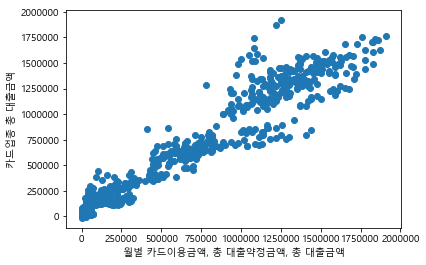

In [16]:
# 선형회귀모델(Linear Regression): 연속적인 범위내에 결과값을 예측
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('월별 카드이용금액, 총 대출약정금액, 총 대출금액')
plt.ylabel('카드업종 총 대출금액')
plt.show()

In [17]:
# # 분류모델(Classification)
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# models = [('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('SVM', SVC()) ]
# seed = 7
# scoring = 'accuracy'
# results = []
# names = []

# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=seed)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

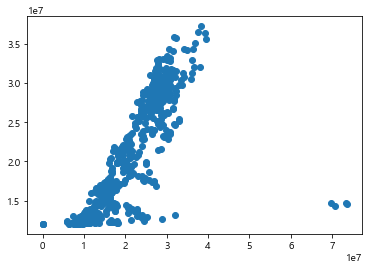

In [18]:
# 신용카드 일시불 과 신용카드 할부로
# 신용대출 대출금액 예측
X = data_by_loc[['credit_card_payment', 'credit_card_installments_payment']]
y = data_by_loc['credit_loan']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

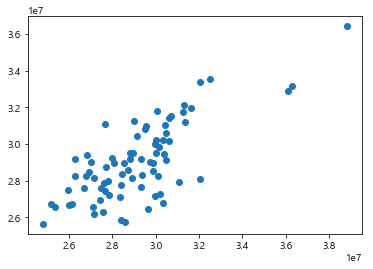

In [19]:
# 신용카드 일시불 과 신용카드 할부로
# 신용대출 대출금액 예측
X = data_by_40s[['credit_card_payment', 'credit_card_installments_payment']]
y = data_by_40s['credit_loan']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

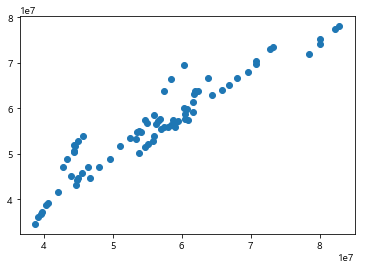

In [20]:
X = data_by_40s[['monthly_card_spend', 'monthly_lc', 'monthly_loan']]
y = data_by_40s['monthly_bk_loan']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

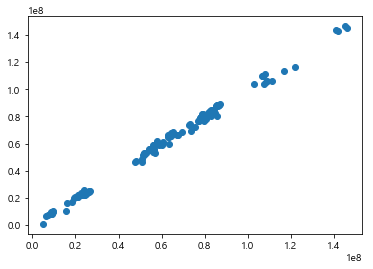

In [21]:
X = data_by_capital[['monthly_card_spend', 'monthly_lc', 'monthly_loan']]
y = data_by_capital['monthly_bk_loan']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

In [22]:
import itertools

lst = [1, 2, 3]
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
    
print(combs)

[[1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]


In [23]:
df = df.drop(['sex','city','ages','pop_cd'],axis=1)

In [27]:
df.columns

Index(['year', 'month', 'avg_score', 'avg_rat', 'population', 'num_opencard',
       'num_usecard', 'monthly_card_spend', 'monthly_lc', 'monthly_loan',
       'monthly_bk_loan', 'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate'],
      dtype='object')

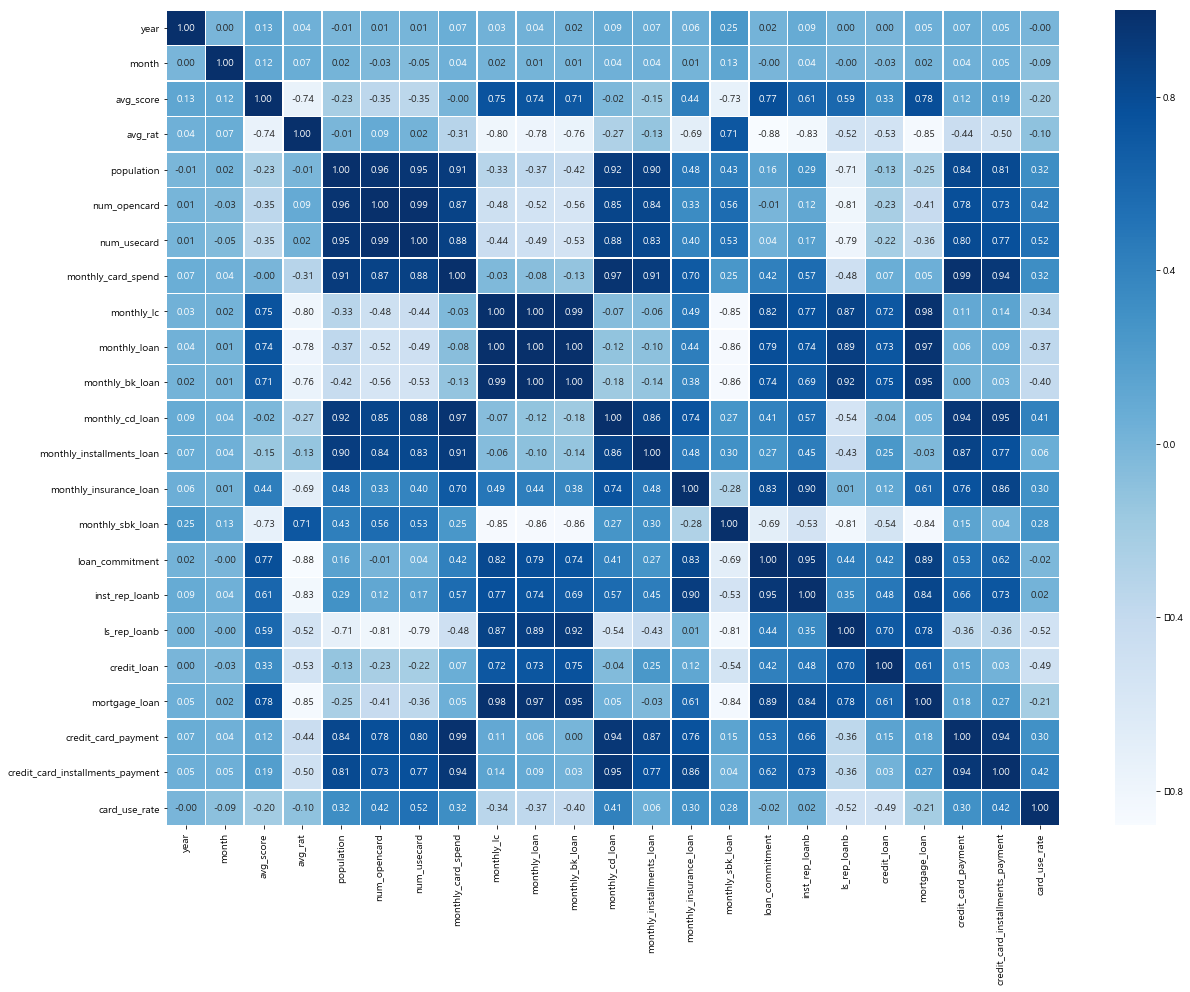

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data_by_seoul.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')

In [28]:
import itertools

lst = ['year', 'month', 'avg_score', 'avg_rat', 'population', 'num_opencard',
       'num_usecard', 'monthly_card_spend', 'monthly_lc', 'monthly_loan',
       'monthly_bk_loan', 'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)
    
print(combs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',max_iter=300,random_state=0)
y_km = km.fit_predict(X)